In [74]:
import sys 
print(sys.executable)

/Users/aslanfeng/anaconda3/bin/python


In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

In [4]:
# read data from csv file. usecols=[1] only extract column[1] element from dataset
dataframe = pd.read_csv("international-airline-passengers.csv", usecols=[1], engine="python")
print(dataframe.head(5))

   Passengers
0         112
1         118
2         132
3         129
4         121


In [5]:
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset[0])

[112.]


In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[0])

[0.01544401]


In [7]:
# split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
# extract train data from row 0 to row train_size, and test data starting
# at train_size location to len(dataset) location
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(train[0:3])
print(test[0:3])

[[0.01544401]
 [0.02702703]
 [0.05405405]]
[[0.4073359 ]
 [0.3803089 ]
 [0.48648646]]


In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
# np.reshape(a, (newshape))
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
# create and fit the LSTM network model
model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
 - 0s - loss: 0.0411
Epoch 2/100
 - 0s - loss: 0.0198
Epoch 3/100
 - 0s - loss: 0.0142
Epoch 4/100
 - 0s - loss: 0.0127
Epoch 5/100
 - 0s - loss: 0.0117
Epoch 6/100
 - 0s - loss: 0.0106
Epoch 7/100
 - 0s - loss: 0.0097
Epoch 8/100
 - 0s - loss: 0.0087
Epoch 9/100
 - 0s - loss: 0.0076
Epoch 10/100
 - 0s - loss: 0.0065
Epoch 11/100
 - 0s - loss: 0.0057
Epoch 12/100
 - 0s - loss: 0.0048
Epoch 13/100
 - 0s - loss: 0.0041
Epoch 14/100
 - 0s - loss: 0.0035
Epoch 15/100
 - 0s - loss: 0.0030
Epoch 16/100
 - 0s - loss: 0.0027
Epoch 17/100
 - 0s - loss: 0.0025
Epoch 18/100
 - 0s - loss: 0.0023
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0021
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0020
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - l

In [11]:
# make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [12]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [14]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) 
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.93 RMSE
Test Score: 47.60 RMSE


In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [19]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

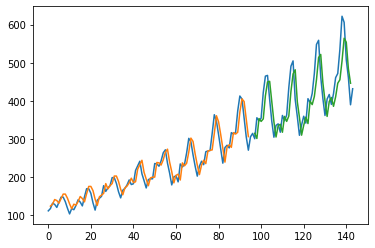

In [20]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()